# Task 1

In [74]:
# Creation of dataframe

import pandas as pd

from pandas import DataFrame

 

df = DataFrame()

df["499 or Less"] = [203, 217, 237, 222, 250, 300, 309, 305, 340, 300,282,170,242,243,261,304,309,369,314,312,275,260,221,248,271,

                    310,312,322,314,353,243,231,222,269,270,312,342,300,373,315,255,231,220,224,230,302,300,312,311,314,230,232,240,

                    236,270,310,304,330,370,400,214,270,208,281,272,228,268,275,242,236,215,212,260,255,298,259,287,238,258,257,256,

                     229,245,202,207,252,204,223,215,211,242,252,289,295,228,227,230,253,216,209]

 

df["500-999"] = [206, 221, 240, 228, 257, 304, 314, 311, 344, 328, 286, 177, 247, 247, 265, 310, 314, 373, 407, 318, 281, 263, 228, 255, 277, 345, 317, 328, 318, 360, 247, 

                234, 225, 272, 273, 319, 349, 305, 380, 331, 260, 236, 223, 227, 234, 309, 303, 318, 314, 320, 234, 235, 243, 243, 273, 317, 311, 355, 360, 425, 219, 276, 

                215, 286, 278, 231, 272, 280, 248, 241, 218, 216, 266, 262, 302, 265, 293, 242, 264, 263, 263, 235, 251, 208, 213, 259, 211, 229, 221, 217, 247, 255, 296, 

                301, 232, 230, 233, 257, 223, 213]

                

df["1000-1499"] = [211, 224, 248, 234, 262, 308, 323, 312, 348, 335, 296, 184, 256, 256, 268, 312, 318, 380, 412, 319, 284, 268, 228, 256, 285, 349, 324, 332, 324, 361, 250, 

                  245, 233, 283, 279, 323, 354, 313, 383, 338, 264, 242, 230, 238, 240, 312, 310, 326, 321, 321, 238, 241, 247, 243, 280, 317, 317, 377, 385, 455, 224, 283, 

                  219, 288, 284, 239, 279, 283, 255, 249, 226, 219, 268, 265, 305, 273, 295, 251, 265, 267, 266, 239, 254, 212, 216, 261, 211, 232, 227, 220, 255, 266, 301, 

                  305, 235, 241, 244, 263, 227, 216]

                 

df["Status"] = ["A","A","A","A","A","P","P","P","P","P","A","A","A","A","A","P","P","P","P","P","A","A","A","A","A",

               "P","P","P","P","P","A","A","A","A","A","P","P","P","P","P","A","A","A","A","A","P","P","P","P","P",

               "A","A","A","A","A","P","P","P","P","P","P","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A",

               "A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A",]

df.index = ["John Smith", "Tiger Aldrin", "Jeremy Cole", "Lee West", "Warren Buff ", "Waldo Where",

            "Patrick Reel", "Vijay Love", "Greta Lindstrom","Jeffrey Bautista","Tiger Mcilroy", 'Rory Johnson', 'Charlie Chris',

           'Bob Harley', "Rick Harrsison", "Ron Burgundy", 'Brick Tamland', 'Wapasha Chelsea', 'Onismu Ruslan', 'Demarcus Rozen'

           'Graham Butler','Patrick Sun','Brian Hay','Roy Curry','Jeff Hopkins',"Carlos Tardiff", "Ben Dover", "Luigi Mario",

            "Kenny Jones", 'John Doe','Wolf Johnson','Dequavious Mitchell','Mike Jackson','Bill Cosby','Giuseppe Pinocchio'

           'John Daly','Glen Lamar',"Gail Beddeker", 'Mike Ehrmentraut','Vince Power','Paul Cable','Eric Watkins','Nick Tesla',

           'Paul Simmons', 'James Barnes','Ted Zedd','Dequavious Mitchell II', 'Rodrigo Bowers', 'Chester Dudley','Steven Champagne'

           'Ray Thompson','Doug Young','Stefon Willis','Richard Lafleur','Davon Budd','Julio Jones','Laplace Transform','Frank Sea',

            'Kanye East','Ben Kim','Amery Merkle','Aidan Maksymchuk','Pierce Decore','Sam Laquerre',"John Smith","Michael Johnson",

            "David Brown", "William Davis","James Wilson","Robert Moore","Joseph Taylor","Charles Anderson","Thomas White", "Daniel Clark",

             "Matthew Lewis", "Christopher Hall", "Andrew Turner","Mark Martin", "Richard Harris", "Paul Lee", "Steven Walker",

            "Brian Young","Kevin Wright","Edward King","George Adams","Donald Nelson","Ronald Baker","Kenneth Roberts","Anthony Carter",

            "Jeffrey Mitchell", "Scott Phillips", "Timothy Foster", "Gary Hayes", "Larry Turner","Stephen Wood", "Frank Reed","Patrick Cook",

            "Raymond Morris", "Gregory Jenkins","Dennis Bennett", "Jerry Bell", "Eric Murphy","Peter Price"]

print(df)

                 499 or Less  500-999  1000-1499 Status
John Smith               203      206        211      A
Tiger Aldrin             217      221        224      A
Jeremy Cole              237      240        248      A
Lee West                 222      228        234      A
Warren Buff              250      257        262      A
...                      ...      ...        ...    ...
Gregory Jenkins          227      230        241      A
Dennis Bennett           230      233        244      A
Jerry Bell               253      257        263      A
Eric Murphy              216      223        227      A
Peter Price              209      213        216      A

[100 rows x 4 columns]


In [75]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

#Splitting up attributes and categories
dfX = df.drop (columns =["Status"])
sy = df.Status

# Creating testing and training set for the model
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split (dfX, sy)

# Encoding the categorical labels
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)
#Converts into a numpy array of integers
y_train = le.transform(sy_train) # 0 is fail, 1 is pass
#Does the opposite operation on a sample
classes = le.inverse_transform( [1,0,0,0,1,1,0,0])

#Scaling of attributes using MinMaxScaler()
nl = preprocessing.MinMaxScaler() 
nl = nl.fit(dfX_train.to_numpy())
X_train = nl.transform(dfX_train.to_numpy())

#Creating the knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)

#Processing of the test datasets
y_test = le.transform(sy_test.to_numpy())
X_test = nl.transform(dfX_test.to_numpy())

# Task 2

### Task 2a

Text(0.5, 1.0, 'Test Set')

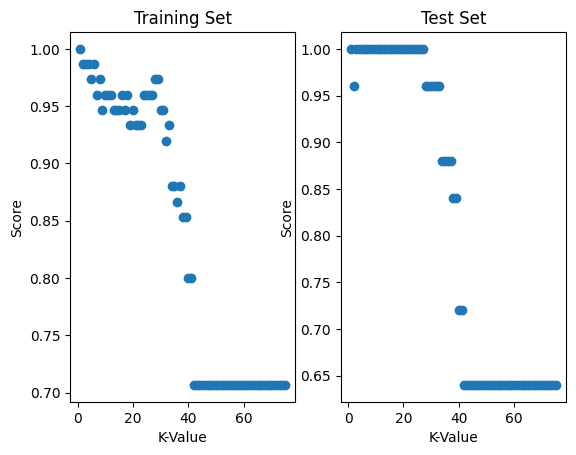

In [76]:
#Creation and population of scores for both test and training sets
k_list = range(1,76)
Train_Score = []
Test_Score = []

for i in k_list: # changes the value of k to compare
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train, y_train)
    Train_Score.append(knn.score(X_train, y_train))
    Test_Score.append(knn.score(X_test, y_test))
    
#Graphing of test and train scores
axs1 = plt.subplot2grid ( shape=(1, 2), loc = (0, 0))
axs2 = plt.subplot2grid ( shape=(1, 2), loc = (0, 1))

axs1.scatter(k_list, Train_Score)
axs1.set_xlabel('K-Value')
axs1.set_ylabel('Score')
axs1.set_title('Training Set')

axs2.scatter(k_list, Test_Score)
axs2.set_xlabel('K-Value')
axs2.set_ylabel('Score')
axs2.set_title('Test Set')

### Task 2b

Text(0.5, 1.0, 'Test Set')

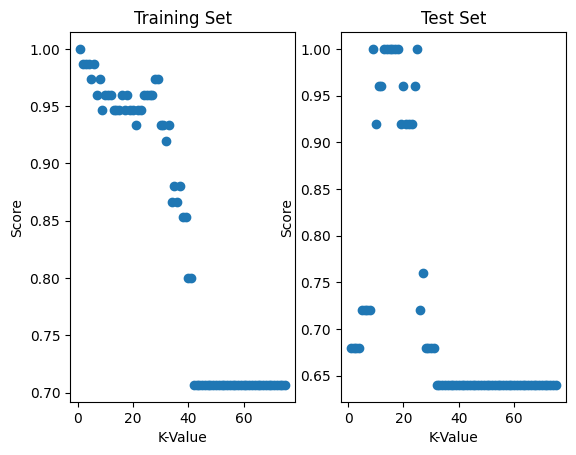

In [77]:
# Altering of Task 1 Variable into StandardScaler()
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(dfX_train.to_numpy())
X_train = scaler.transform(dfX_train.to_numpy())

# Repitition of 2a with the new X_train
Train_Score.clear(), Test_Score.clear()
for i in k_list: # changes the value of k to compare
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train, y_train)
    Train_Score.append(knn.score(X_train, y_train))
    Test_Score.append(knn.score(X_test, y_test))
    
#Graphing of test and train scores
axs1 = plt.subplot2grid ( shape=(1, 2), loc = (0, 0))
axs2 = plt.subplot2grid ( shape=(1, 2), loc = (0, 1))

axs1.scatter(k_list, Train_Score)
axs1.set_xlabel('K-Value')
axs1.set_ylabel('Score')
axs1.set_title('Training Set')

axs2.scatter(k_list, Test_Score)
axs2.set_xlabel('K-Value')
axs2.set_ylabel('Score')
axs2.set_title('Test Set')


# Task 3

### Based on multiple trials, it seems like the best k value is 1. Since both classifiers seem to work pretty identically, MinMaxScaler provides easier values to work with, thus we'll use it from now on.

In [78]:
# Final Model being used (Everything being redefined)

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

df = DataFrame()

df["499 or Less"] = [203, 217, 237, 222, 250, 300, 309, 305, 340, 300,282,170,242,243,261,304,309,369,314,312,275,260,221,248,271,

                    310,312,322,314,353,243,231,222,269,270,312,342,300,373,315,255,231,220,224,230,302,300,312,311,314,230,232,240,

                    236,270,310,304,330,370,400,214,270,208,281,272,228,268,275,242,236,215,212,260,255,298,259,287,238,258,257,256,

                     229,245,202,207,252,204,223,215,211,242,252,289,295,228,227,230,253,216,209]

 

df["500-999"] = [206, 221, 240, 228, 257, 304, 314, 311, 344, 328, 286, 177, 247, 247, 265, 310, 314, 373, 407, 318, 281, 263, 228, 255, 277, 345, 317, 328, 318, 360, 247, 

                234, 225, 272, 273, 319, 349, 305, 380, 331, 260, 236, 223, 227, 234, 309, 303, 318, 314, 320, 234, 235, 243, 243, 273, 317, 311, 355, 360, 425, 219, 276, 

                215, 286, 278, 231, 272, 280, 248, 241, 218, 216, 266, 262, 302, 265, 293, 242, 264, 263, 263, 235, 251, 208, 213, 259, 211, 229, 221, 217, 247, 255, 296, 

                301, 232, 230, 233, 257, 223, 213]

                

df["1000-1499"] = [211, 224, 248, 234, 262, 308, 323, 312, 348, 335, 296, 184, 256, 256, 268, 312, 318, 380, 412, 319, 284, 268, 228, 256, 285, 349, 324, 332, 324, 361, 250, 

                  245, 233, 283, 279, 323, 354, 313, 383, 338, 264, 242, 230, 238, 240, 312, 310, 326, 321, 321, 238, 241, 247, 243, 280, 317, 317, 377, 385, 455, 224, 283, 

                  219, 288, 284, 239, 279, 283, 255, 249, 226, 219, 268, 265, 305, 273, 295, 251, 265, 267, 266, 239, 254, 212, 216, 261, 211, 232, 227, 220, 255, 266, 301, 

                  305, 235, 241, 244, 263, 227, 216]

                 

df["Status"] = ["A","A","A","A","A","P","P","P","P","P","A","A","A","A","A","P","P","P","P","P","A","A","A","A","A",

               "P","P","P","P","P","A","A","A","A","A","P","P","P","P","P","A","A","A","A","A","P","P","P","P","P",

               "A","A","A","A","A","P","P","P","P","P","P","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A",

               "A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A","A",]

df.index = ["John Smith", "Tiger Aldrin", "Jeremy Cole", "Lee West", "Warren Buff ", "Waldo Where",

            "Patrick Reel", "Vijay Love", "Greta Lindstrom","Jeffrey Bautista","Tiger Mcilroy", 'Rory Johnson', 'Charlie Chris',

           'Bob Harley', "Rick Harrsison", "Ron Burgundy", 'Brick Tamland', 'Wapasha Chelsea', 'Onismu Ruslan', 'Demarcus Rozen'

           'Graham Butler','Patrick Sun','Brian Hay','Roy Curry','Jeff Hopkins',"Carlos Tardiff", "Ben Dover", "Luigi Mario",

            "Kenny Jones", 'John Doe','Wolf Johnson','Dequavious Mitchell','Mike Jackson','Bill Cosby','Giuseppe Pinocchio'

           'John Daly','Glen Lamar',"Gail Beddeker", 'Mike Ehrmentraut','Vince Power','Paul Cable','Eric Watkins','Nick Tesla',

           'Paul Simmons', 'James Barnes','Ted Zedd','Dequavious Mitchell II', 'Rodrigo Bowers', 'Chester Dudley','Steven Champagne'

           'Ray Thompson','Doug Young','Stefon Willis','Richard Lafleur','Davon Budd','Julio Jones','Laplace Transform','Frank Sea',

            'Kanye East','Ben Kim','Amery Merkle','Aidan Maksymchuk','Pierce Decore','Sam Laquerre',"John Smith","Michael Johnson",

            "David Brown", "William Davis","James Wilson","Robert Moore","Joseph Taylor","Charles Anderson","Thomas White", "Daniel Clark",

             "Matthew Lewis", "Christopher Hall", "Andrew Turner","Mark Martin", "Richard Harris", "Paul Lee", "Steven Walker",

            "Brian Young","Kevin Wright","Edward King","George Adams","Donald Nelson","Ronald Baker","Kenneth Roberts","Anthony Carter",

            "Jeffrey Mitchell", "Scott Phillips", "Timothy Foster", "Gary Hayes", "Larry Turner","Stephen Wood", "Frank Reed","Patrick Cook",

            "Raymond Morris", "Gregory Jenkins","Dennis Bennett", "Jerry Bell", "Eric Murphy","Peter Price"]

#Splitting up attributes and categories
dfX = df.drop (columns =["Status"])
sy = df.Status

# Creating testing and training set for the model
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split (dfX, sy)

# Encoding the categorical labels
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)
#Converts into a numpy array of integers
y_train = le.transform(sy_train) # 0 is fail, 1 is pass

#Scaling of attributes using MinMaxScaler()
nl = preprocessing.MinMaxScaler() 
nl = nl.fit(dfX_train.to_numpy())
X_train = nl.transform(dfX_train.to_numpy())

#Creating the knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)

#Processing of the test datasets
y_test = le.transform(sy_test.to_numpy())
X_test = nl.transform(dfX_test.to_numpy())

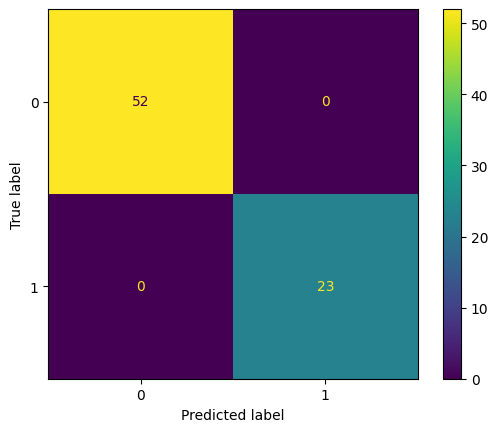

In [79]:
#Calculation of the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_train
y_pred = knn.predict(X_train)
cm = confusion_matrix(y_true, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)

display.plot()
plt.show()


In [80]:
'''
A confusion matrix can be defined as follows:
- As we previously know, a matrix has i rows and j columns
- In a confusion matrix, the ith column represents the class of the instance being predictred
- The jth column represents each possible class prediction
- The data point at position [i][j] represents the number of time a prediction of j is made for class i
- All entries along the diagonal are considered correct predictions

Source: sklearn.metrics.confusion_matrix. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
'''

'\nA confusion matrix can be defined as follows:\n- As we previously know, a matrix has i rows and j columns\n- In a confusion matrix, the ith column represents the class of the instance being predictred\n- The jth column represents each possible class prediction\n- The data point at position [i][j] represents the number of time a prediction of j is made for class i\n- All entries along the diagonal are considered correct predictions\n\nSource: sklearn.metrics.confusion_matrix. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html\n'

# Task 4

In [81]:
#Predicts whether this student passed of failed based on our classifier
new_data = np.array([[55, 85]])
X_new = nl.transform(new_data)
knn.predict(X_new)

ValueError: X has 2 features, but MinMaxScaler is expecting 3 features as input.